#**Image Gradients & Edges**

##**1. What Are Image Gradients?**

Image gradients measure **how fast the pixel intensity is changing** in an image.
Think of an image as a height-map and light intensity as the “height.” Gradients tell us how steep the surface is.

* **Small change → flat → no edge**
* **Large change → steep → edge**

Gradients have two components:

* **Gx:** Change along X-direction (left ↔ right)
* **Gy:** Change along Y-direction (top ↕ bottom)

From Gx and Gy we compute:

* **Gradient magnitude**: Gradient_Magnitude = sqrt( (Gx * Gx) + (Gy * Gy) )

* **Gradient direction**: Gradient_Direction = arctan( Gy / Gx )

---

## **2. Why Are Gradients Important?**

Edges define:

* object boundaries
* shapes
* texture transitions
* structural details

Nearly every classical CV algorithm (*HOG, Canny, SIFT, SURF, optical flow*) depends on gradients.

Even deep neural networks learn edge detectors in their **first convolution layer**.

---

## **3. Operators for Computing Gradients**

### **a) Prewitt Operator**

* Simple derivative kernels
* Good for basic understanding
* Not very noise-robust

### **b) Sobel Operator**

* Adds smoothing
* Better than Prewitt
* Industry standard

### **c) Scharr Operator**

* Most accurate gradient operator
* Best for high-precision scientific CV

---

## **4. What Are Edges?**

Edges occur when gradient magnitude is very high.
So edges = places with a large intensity jump.

---

## **5. Canny Edge Detection (Gold Standard)**

Steps:

1. Gaussian blur
2. Compute gradients using Sobel
3. Non-maximum suppression
4. Double threshold
5. Hysteresis to track valid edges

Why we use it:

* clean edges
* noise-resistant
* great for object boundary detection

---

## **6. How Gradients Connect to Vision Applications**

Gradients are directly used in:

* object tracking
* corner detection
* pose estimation
* currency note verification
* robot navigation
* face & gesture detection
* image segmentation

---
---


#**Implementation :**

## 🔧 **1. Setup**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show(img, title="", cmap='gray', size=5):
    plt.figure(figsize=(size, size))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

---

## 📥 **2. Load Image**


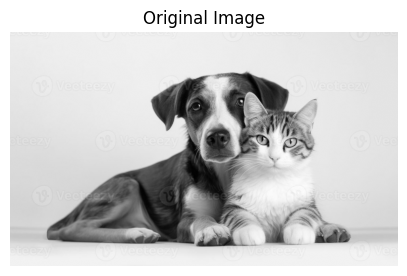

In [3]:
img = cv2.imread("sample.jpg", 0)   # grayscale image
show(img, "Original Image")

---

## ⚡ **3. Sobel Gradients (Gx & Gy)**


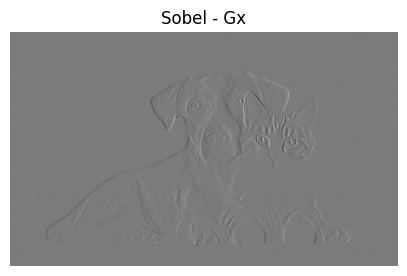

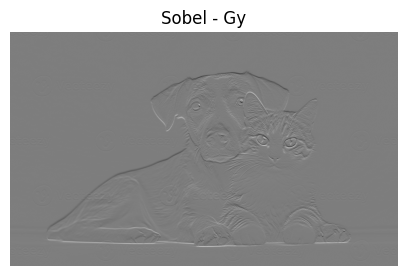

In [4]:
Gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
Gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

show(Gx, "Sobel - Gx")
show(Gy, "Sobel - Gy")

---

## 📐 **4. Gradient Magnitude & Direction**


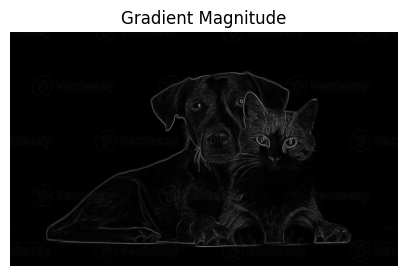

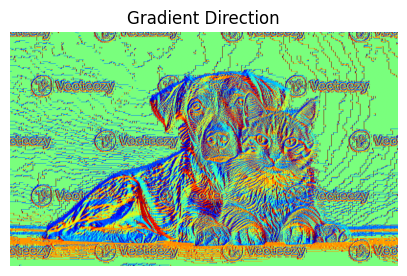

In [5]:
magnitude = np.sqrt(Gx**2 + Gy**2)
magnitude = np.uint8((magnitude / magnitude.max()) * 255)

direction = np.arctan2(Gy, Gx)

show(magnitude, "Gradient Magnitude")
show(direction, "Gradient Direction", cmap='jet')

---

## 🧰 **5. Prewitt Operator**


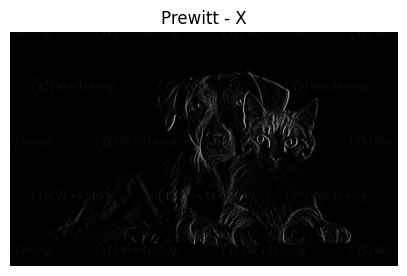

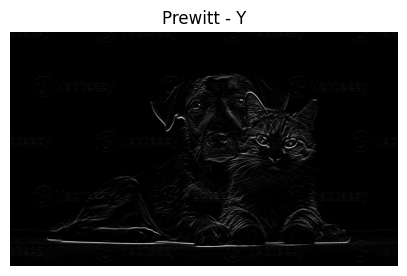

In [6]:
prewitt_x = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitt_y = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

Px = cv2.filter2D(img, -1, prewitt_x)
Py = cv2.filter2D(img, -1, prewitt_y)

show(Px, "Prewitt - X")
show(Py, "Prewitt - Y")

---

## 📏 **6. Scharr Operator**

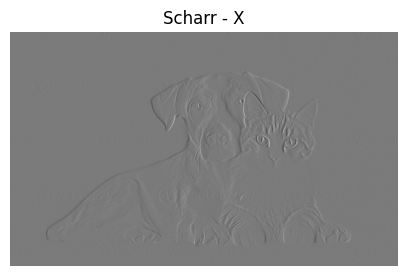

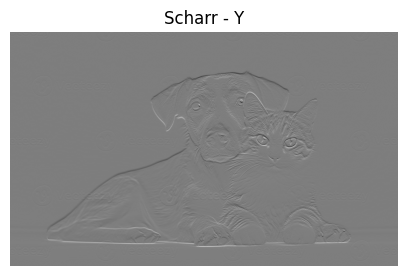

In [7]:
Sx = cv2.Scharr(img, cv2.CV_64F, 1, 0)
Sy = cv2.Scharr(img, cv2.CV_64F, 0, 1)

show(Sx, "Scharr - X")
show(Sy, "Scharr - Y")

---

## 🔪 **7. Canny Edge Detection**


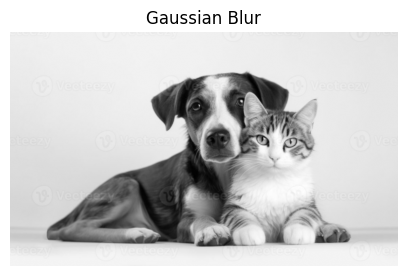

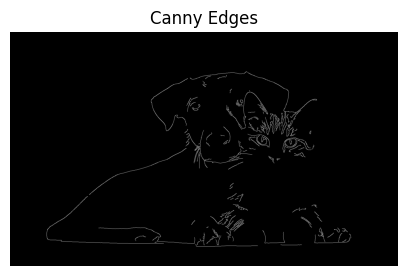

In [8]:
blur = cv2.GaussianBlur(img, (5,5), 0)
edges = cv2.Canny(blur, 100, 200)

show(blur, "Gaussian Blur")
show(edges, "Canny Edges")

---

## 🧱 **8. Optional: Edge Enhancement via Morphology**


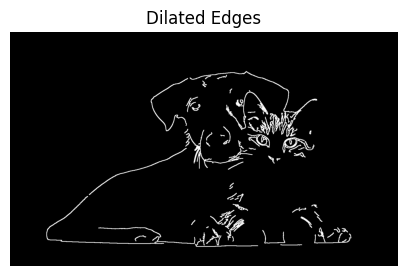

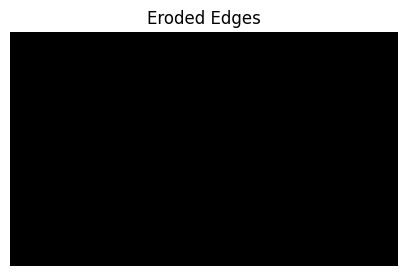

In [9]:
kernel = np.ones((3,3), np.uint8)
dilated = cv2.dilate(edges, kernel, iterations=1)
eroded = cv2.erode(edges, kernel, iterations=1)

show(dilated, "Dilated Edges")
show(eroded, "Eroded Edges")


---
---


## **SUMMARY**

---

## 🎯 **Key Takeaways**

* Gradients measure intensity variation.
* Sobel gives smooth, noise-resistant gradients.
* Scharr gives the highest precision.
* Edge detection = high gradient magnitude.
* Canny edge detector provides the cleanest, most reliable edges.
* Gradients are the foundation for HOG, SIFT, SURF, corner detection, object tracking, and classical CV.

---

# 🗂️ **Additional Reference — OpenCV Function Syntax Guide**

This section gives you a quick-access lookup table for every inbuilt function used in gradient and edge detection. Ideal for refreshing during implementation or debugging.

---

## 📌 **1. cv2.imread()**

```
cv2.imread(filename, flags)
```

* **filename** → Path to the image
* **flags** → 0: grayscale, 1: color, -1: unchanged

---

## 📌 **2. cv2.Sobel()**

```
cv2.Sobel(src, ddepth, dx, dy, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
```

* **src** → Input image
* **ddepth** → Output depth (e.g., cv2.CV_64F)
* **dx / dy** → Derivative order along X / Y
* **ksize** → Kernel size (1, 3, 5, 7)

---

## 📌 **3. cv2.filter2D()**

```
cv2.filter2D(src, ddepth, kernel, anchor=(-1,-1), delta=0, borderType=cv2.BORDER_DEFAULT)
```

* Apply custom filters (Prewitt, etc.).

---

## 📌 **4. cv2.Scharr()**

```
cv2.Scharr(src, ddepth, dx, dy, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
```

* Higher-accuracy Sobel alternative
* Fixed 3×3 kernel

---

## 📌 **5. cv2.GaussianBlur()**

```
cv2.GaussianBlur(src, ksize, sigmaX, sigmaY=0, borderType=cv2.BORDER_DEFAULT)
```

* **ksize** → (3,3), (5,5), etc.
* **sigmaX** → Gaussian standard deviation

---

## 📌 **6. cv2.Canny()**

```
cv2.Canny(image, threshold1, threshold2, apertureSize=3, L2gradient=False)
```

* **threshold1** → lower
* **threshold2** → upper

---

## 📌 **7. cv2.dilate()**

```
cv2.dilate(src, kernel, iterations=1)
```

* Expands white regions / edges

---

## 📌 **8. cv2.erode()**

```
cv2.erode(src, kernel, iterations=1)
```

* Shrinks white regions / edges

---

## 📌 **9. numpy.sqrt()**

```
np.sqrt(array)
```

---

## 📌 **10. numpy.arctan2()**

```
np.arctan2(y, x)
```

* Reliable angle calculation (avoids divide-by-zero issues)

---

## 🔧 **Gradient Math — TXT Version**

```
Gradient_Magnitude = sqrt( (Gx * Gx) + (Gy * Gy) )
Gradient_Direction = arctan( Gy / Gx )
```

---